## Setup



In [1]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, transpile, Aer, IBMQ # circuit creation and execution
from qiskit.providers.aer.noise import NoiseModel # simulate backends
from qiskit.visualization import plot_histogram # visualize results
from qiskit.quantum_info import Statevector, state_fidelity, hellinger_fidelity # statevector and metrics
from qiskit.providers.ibmq import least_busy # get least busy device
import qiskit.tools.jupyter # visualize backends
from qiskit.circuit.library.standard_gates.rx import RXGate
# from qiskit.ignis.mitigation.measurement import complete_meas_cal,CompleteMeasFitter # measurement error mitigation

import pandas as pd # handy tools for calculation
from numpy import pi

# global vars
n = 3 # number of qubits
shots = 1000 # high number of shots per execution

## Own Code

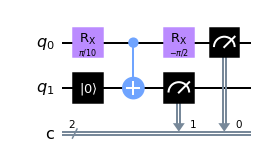

In [2]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi/10, qreg_q[0])
circuit.reset(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rx(-pi/2, qreg_q[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw(output='mpl')

Conversion to Qasm

In [3]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
rx(pi/10) q[0];
reset q[1];
cx q[0],q[1];
rx(-pi/2) q[0];
measure q[1] -> c[1];
measure q[0] -> c[0];



Simulated Output

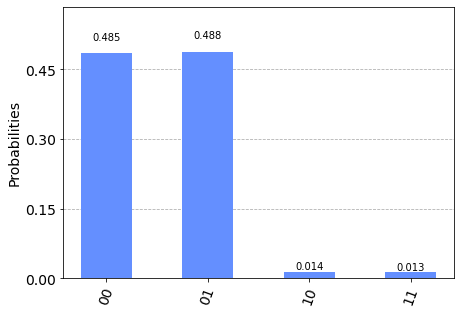

In [4]:
# Running the basic bomb tester circuit

from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Setup for Noise optimization
## might improve , shorten code

In [5]:
expected_states = ['00', '01', '10', '11']  # target states

def get_state_accuracy(counts): # funciton to calculate state accuracy
    expected_counts = 0
    for state in counts.keys():
        if state in expected_states:
            expected_counts = expected_counts + counts[state]
    state_accuracy = expected_counts / shots
    return str(state_accuracy*100)+"%"

In [6]:
counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts() # execution on simulator
state_accuracy = get_state_accuracy(counts)
print(f"state accuracy on the simulator: {state_accuracy}")

state accuracy on the simulator: 100.0%


Importing fake Backend

In [7]:
from qiskit.test.mock import *

backends = [FakeVigo()]
backend1 = FakeVigo()

importing backend Santiago

Noise Optimization generally (fake backend)

In [8]:
# compare transpiled circuits for different optimization levels on backend 1

optimization_levels = [0,1,2,3]
print("original circuit")
print(circuit)
for optim_level in optimization_levels:
    print(f"optimization level: {optim_level}")
    transpiled_circuit = transpile(circuit, backend=backend1, optimization_level=optim_level)
    print(transpiled_circuit)
    print(transpiled_circuit.qasm())

original circuit
     ┌──────────┐     ┌──────────┐┌─┐
q_0: ┤ Rx(π/10) ├──■──┤ Rx(-π/2) ├┤M├
     └──────────┘┌─┴─┐└───┬─┬────┘└╥┘
q_1: ────|0>─────┤ X ├────┤M├──────╫─
                 └───┘    └╥┘      ║ 
c: 2/══════════════════════╩═══════╩═
                           1       0 
optimization level: 0
global phase: π
               ┌─────────┐┌────┐┌────────────┐┌────┐┌──────────┐     »
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(11π/10) ├┤ √X ├┤ Rz(5π/2) ├──■──»
               └─────────┘└────┘└────────────┘└────┘└──────────┘┌─┴─┐»
      q_1 -> 1 ────|0>──────────────────────────────────────────┤ X ├»
                                                                └───┘»
ancilla_0 -> 2 ──────────────────────────────────────────────────────»
                                                                     »
ancilla_1 -> 3 ──────────────────────────────────────────────────────»
                                                                     »
ancilla_2 -> 4 ─────────────────────────

Output of the transpiled Circuit

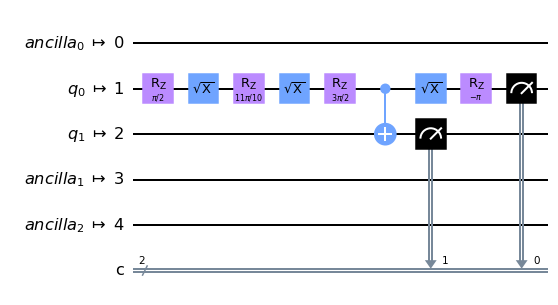

In [9]:
transpiled_circuit.draw(output='mpl')

# Analysis of Probability outcome 
Volaris base qv8 (00)
Volaris noise qv8 (01)
Valaris base qv32 (10)
Volaris noise qv32 (11)

biscuit base qv8 (A)
biscuit noise qv8 (B)
biscuit base qv32 (C)
biscuit noise qv32 (D)

## noise optimization Biscuit V1 
A vs B
C vs D

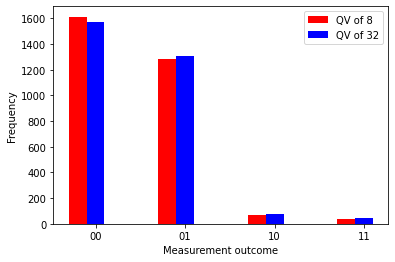

A vs B


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('A.csv' )
df2 = pd.read_csv('B.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("A vs B")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('C.csv' )
df2 = pd.read_csv('D.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("C vs D")

## noise optimization Volaris V2 
00 vs 01
10 vs 11

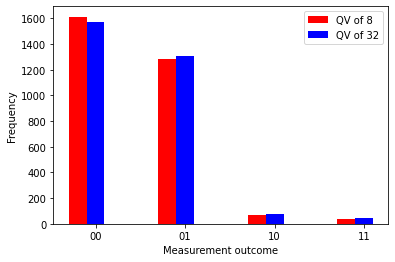

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('00.csv' )
df2 = pd.read_csv('01.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("00 vs 01")
#not functional

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('10.csv' )
df2 = pd.read_csv('11.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("10 vs 11")
#not functional

## biscuit comparison qv increaes 
A vs C
B vs D

biscuit hardware qv increase comparison

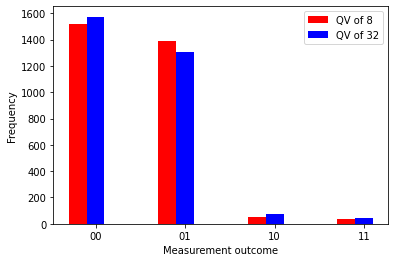

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('A.csv' )
df2 = pd.read_csv('C.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("A vs C")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('B.csv' )
df2 = pd.read_csv('D.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("B vs D")

## Volaris comparison qv increaes 
00 vs 10
01 vs 11

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('00.csv' )
df2 = pd.read_csv('10.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("00 vs 10")
#not functional

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('01.csv' )
df2 = pd.read_csv('11.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("01 vs 11")
#not functional

## overall increase biscuit
A vs D

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('A.csv' )
df2 = pd.read_csv('D.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("A vs D")

## overall increase Volaris
00 vs 11

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('00.csv' )
df2 = pd.read_csv('11.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["00","01","10","11"],label='QV of 32')
plt.legend()
plt.show()
print("00 vs 11")
#not functional

Volaris hardware qv increase comparison

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (52,)  and requested shape (53,)

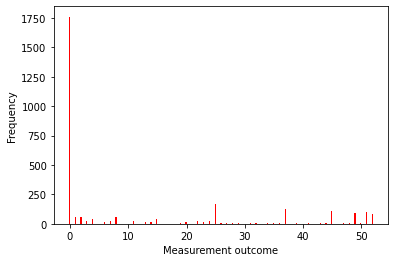

In [19]:
#import pandas as pd
#import matplotlib.pyplot as plt

#df1 = pd.read_csv('volaris-base-3000-q32-manila.csv' )
#df2 = pd.read_csv('volaris-noise-3000-santiago.csv')
#df1["versuch"]="r"
#df2["versuch"]="b"

#print(df)
#plt.ylabel("Frequency")
#plt.xlabel("Measurement outcome")
#plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["000000","000001","000010","000011","000100","000101","000110","000111","001000","001001","001011","001100","001101","001110","001111","010000","010001","010100","010110","010111","011000","011010","011100","011110","011111","100000","100001","100010","100100","100110","100111“,“101000","101010","101011","101100","101110","101111","110000","110001","110010","110011","110100","110101","110110","110111","111000","111001","111010","111011","111100","111101","111110","111111"],label='QV of 8')
#plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["000000","000001","000010","000011","000100","000101","000110","000111","001000","001001","001011","001100","001101","001110","001111","010000","010001","010100","010110","010111","011000","011010","011100","011110","011111","100000","100010","100100","100110","100111","101000""101010","101011","101100","101110","101111","110000","110010""110011","110100","110101","110110","110111","111000","111001","111010","111011","111100","111101","111110","111111"],label='QV of 32')
#plt.legend()
#plt.show()

Optimizing for backend santiago
## test

In [10]:
IBMQ.save_account('17c5b4b1ba814db12e31fd196aba92d7fc969426cee135ecf7213d619bff7cd27595e05b223b085e5cd872da57c3874e82a12d1b136d3b8868695c7437bf787d',overwrite=True)
priver = IBMQ.load_account()
backend_santi = provider.backend.ibmq_santiago

NameError: name 'provider' is not defined

In [ ]:
optimization_levels = [0,1,2,3]
print("original circuit")
print(circuit)
for optim_level in optimization_levels:
    print(f"optimization level: {optim_level}")
    transpiled_circuit = transpile(circuit, backend=backend_santi, optimization_level=optim_level)
    print(transpiled_circuit)
    print(transpiled_circuit.qasm())